In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-performance-and-productivity-data/Extended_Employee_Performance_and_Productivity_Data.csv


In [2]:
file_path = '/kaggle/input/employee-performance-and-productivity-data/Extended_Employee_Performance_and_Productivity_Data.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
print('target variable = "Performance_Score"')

target variable = "Performance_Score"


In [5]:
# norm cols 
df.columns = df.columns.str.lower()
print(df.columns)

Index(['employee_id', 'department', 'gender', 'age', 'job_title', 'hire_date',
       'years_at_company', 'education_level', 'performance_score',
       'monthly_salary', 'work_hours_per_week', 'projects_handled',
       'overtime_hours', 'sick_days', 'remote_work_frequency', 'team_size',
       'training_hours', 'promotions', 'employee_satisfaction_score',
       'resigned'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   employee_id                  100000 non-null  int64  
 1   department                   100000 non-null  object 
 2   gender                       100000 non-null  object 
 3   age                          100000 non-null  int64  
 4   job_title                    100000 non-null  object 
 5   hire_date                    100000 non-null  object 
 6   years_at_company             100000 non-null  int64  
 7   education_level              100000 non-null  object 
 8   performance_score            100000 non-null  int64  
 9   monthly_salary               100000 non-null  float64
 10  work_hours_per_week          100000 non-null  int64  
 11  projects_handled             100000 non-null  int64  
 12  overtime_hours               100000 non-null  int64  
 13  

<Axes: >

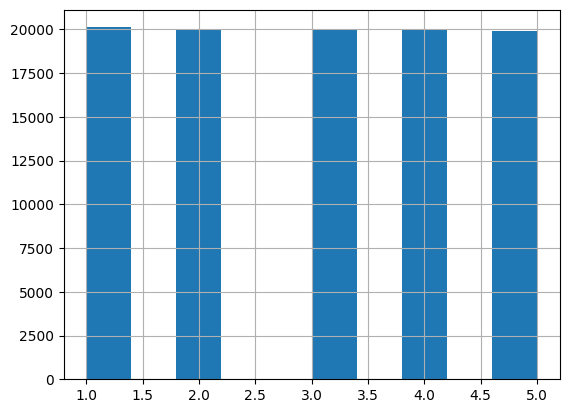

In [7]:
df.performance_score.hist()

In [8]:
print('min and max values for target variables are 1 and 5')
print('since there are 5 values, this problem could be interpreted as classification and not regression.')

min and max values for target variables are 1 and 5
since there are 5 values, this problem could be interpreted as classification and not regression.


In [9]:
# categorical variabes
df_cat = df.loc[:, df.dtypes == 'object']
df_cat = df_cat.drop('hire_date', axis='columns')
for col in df_cat:
    print(df[col].unique(), df[col].unique().__len__())

['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal'] 9
['Male' 'Female' 'Other'] 3
['Specialist' 'Developer' 'Analyst' 'Manager' 'Technician' 'Engineer'
 'Consultant'] 7
['High School' 'Bachelor' 'Master' 'PhD'] 4


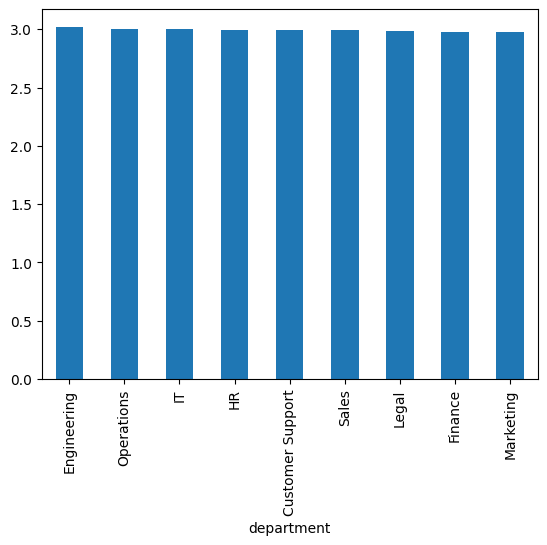

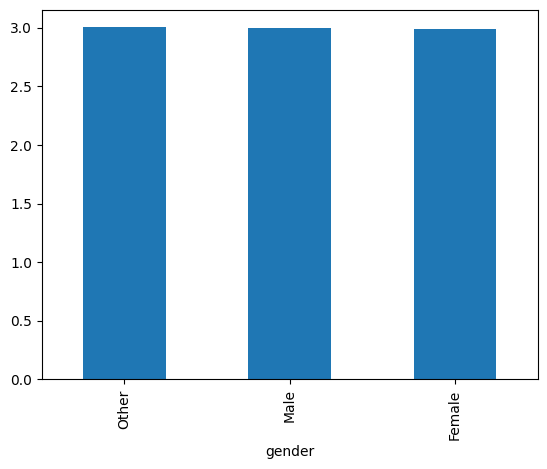

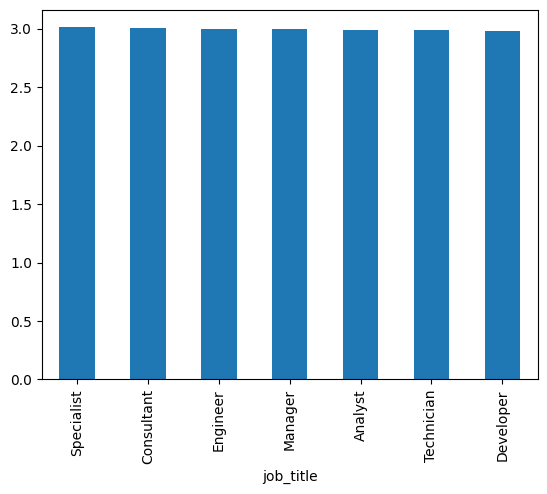

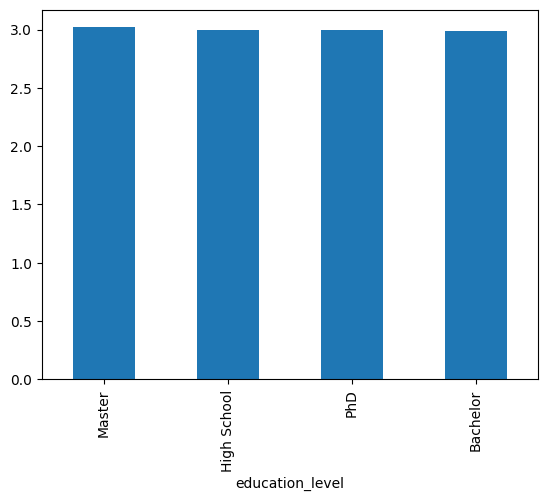

In [10]:
for col in df_cat:
    plt.figure()
    (df.groupby(col)['performance_score'].mean().sort_values(ascending=False).plot(kind='bar'))
    plt.plot()

In [11]:
# looks like categorical variables do not effect performance

<Axes: >

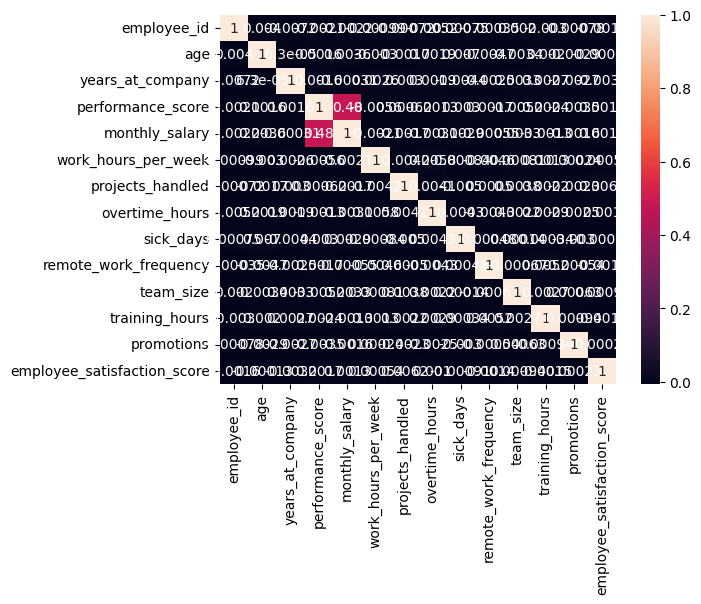

In [12]:
import seaborn as sns

df_num = df.select_dtypes('number')
sns.heatmap(df_num.corr(method='spearman'), annot=True)

<Axes: >

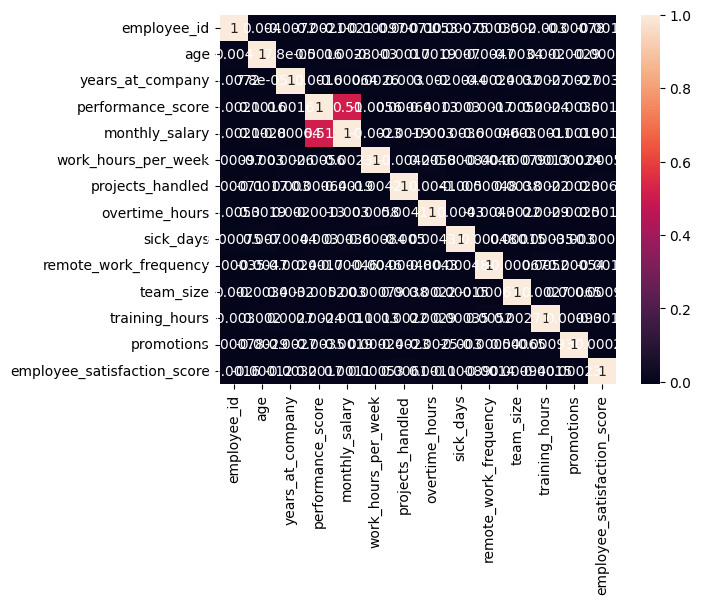

In [13]:
sns.heatmap(df_num.corr(method='pearson'), annot=True)

looks like no linear or non-linear relationships exist in the data, are numerical data actually numerical or categorical?

In [14]:
for col in df_num:
    print(col,len(df_num[col].unique()), sep=':')

employee_id:100000
age:39
years_at_company:11
performance_score:5
monthly_salary:28
work_hours_per_week:31
projects_handled:50
overtime_hours:30
sick_days:15
remote_work_frequency:5
team_size:19
training_hours:100
promotions:3
employee_satisfaction_score:401


All of the variables could be inputted to the model as categorical not numerical, so will try that first and see the performance. 

If it doesnt do well, the discretezation of columns to reduce the number of bins could help the model in learning.

In [15]:
df_num.sample(10)

,employee_id,age,years_at_company,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score
81215,81216,56,0,5,5250.0,39,3,0,6,50,5,85,2,3.21
42481,42482,29,5,1,4950.0,53,17,3,10,25,19,17,2,4.68
44181,44182,42,8,3,6500.0,37,46,6,6,100,19,8,1,4.99
16968,16969,36,9,1,4950.0,34,11,25,13,100,16,15,0,2.06
70086,70087,34,9,2,6000.0,31,4,12,7,0,3,77,2,2.51
51125,51126,39,2,3,5850.0,60,4,7,9,100,4,46,2,3.78
56519,56520,41,0,5,6000.0,60,16,29,2,50,16,77,0,1.42
41024,41025,47,5,2,7200.0,47,15,22,4,75,7,90,2,3.73
59616,59617,35,8,1,3850.0,37,29,10,8,75,12,67,2,1.95
87518,87519,36,8,3,5850.0,60,30,27,2,100,18,93,1,1.94


In [16]:
df_num.performance_score.value_counts() # how is the performance scores uniformally distributed, thats weird...

performance_score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

In [17]:
df_num.loc[df_num.performance_score == 5].sample(5)

,employee_id,age,years_at_company,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score
5770,5771,51,1,5,6000.0,39,3,20,14,100,3,80,2,4.78
51428,51429,48,7,5,6750.0,38,46,24,11,0,13,52,0,2.92
98018,98019,41,9,5,7500.0,39,48,23,13,50,6,75,0,1.69
11455,11456,43,9,5,6000.0,40,4,28,2,100,14,0,1,4.25
53010,53011,27,1,5,6750.0,41,33,24,7,25,3,77,0,3.28


In [18]:
df_num.loc[df_num.performance_score == 1].sample(5)

,employee_id,age,years_at_company,performance_score,monthly_salary,work_hours_per_week,projects_handled,overtime_hours,sick_days,remote_work_frequency,team_size,training_hours,promotions,employee_satisfaction_score
56957,56958,25,3,1,6600.0,32,2,21,7,75,13,4,1,2.42
49859,49860,45,3,1,3850.0,48,23,11,8,25,9,65,0,4.14
86751,86752,56,1,1,6600.0,34,39,9,11,50,8,93,1,4.51
8699,8700,41,0,1,4400.0,59,48,23,1,0,1,4,0,1.22
4166,4167,56,5,1,4400.0,52,33,6,14,100,6,72,2,2.18


In [19]:
df.groupby('performance_score').age.mean()

performance_score
1    41.001193
2    41.004947
3    41.006600
4    41.135256
5    40.999448
Name: age, dtype: float64

In [20]:
df.groupby('performance_score').years_at_company.mean()

performance_score
1    4.492296
2    4.453255
3    4.464873
4    4.469208
5    4.500703
Name: years_at_company, dtype: float64

In [21]:
df.groupby('performance_score').employee_satisfaction_score.mean()

performance_score
1    2.991479
2    3.003235
3    3.001794
4    2.998041
5    3.000940
Name: employee_satisfaction_score, dtype: float64

picking an ensemble model as a starter with all features one hot encoded and see if thats too much noise or not.

In [22]:
import xgboost as xgb
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



y = df.performance_score
X = df.drop(['performance_score', 'employee_id', 'hire_date'], axis='columns')
X = pd.get_dummies(X) 
y = y - np.min(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

clf = xgb.XGBClassifier(tree_method = "hist", device = "cuda")
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

eval_model = classification_report(y_test, y_hat)
print(eval_model)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:16:26] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5030
           1       1.00      1.00      1.00      5003
           2       1.00      1.00      1.00      5000
           3       1.00      1.00      1.00      4985
           4       1.00      1.00      1.00      4982

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

